In [3]:
import torch
print(torch.__version__)

2.4.0


In [4]:
from transformers import pipeline
import time

#initialize the local language model
generator = pipeline('text-generation', model='EleutherAI/gpt-neo-1.3B')

def get_response_time(prompt):
    start_time = time.time()
    response = generator(prompt, max_length=30)
    end_time = time.time()
    return end_time - start_time

num_samples = 100
response_times = []

for _ in range(num_samples):
    response_time = get_response_time("Tell me a fun fact!")
    response_times.append(response_time)
    time.sleep(1)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

Sample Mean: 7.618947088718414
Variance: 5.433234094830181
Estimated Lambda: 0.1312517318148498
Variance of Response Times: 5.3789017538818795
KS Test Statistic: 0.45908371573558027
P-Value: 8.482736704198541e-20


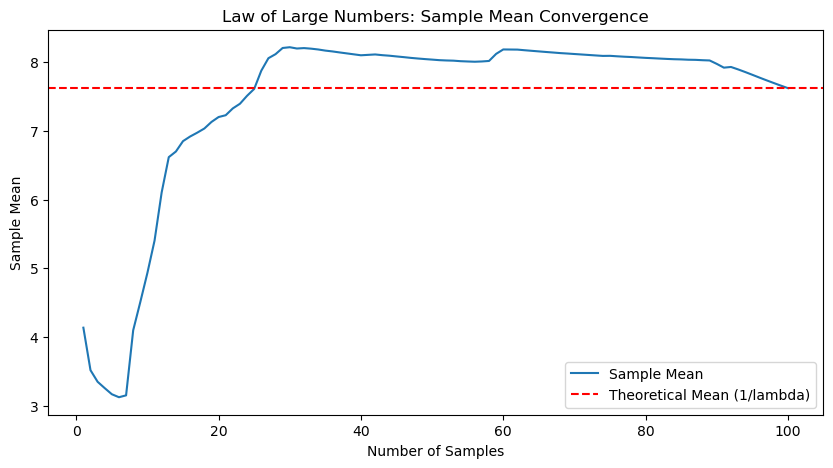

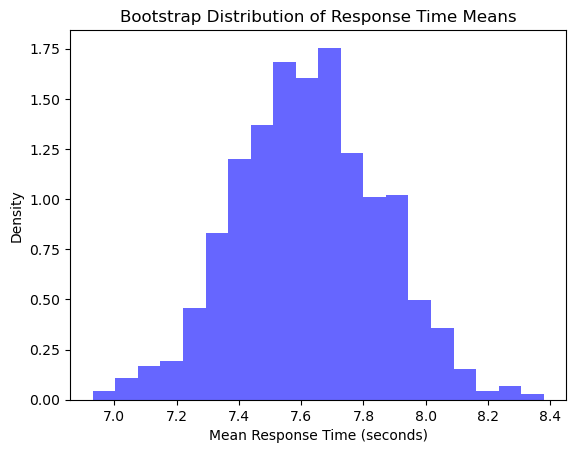

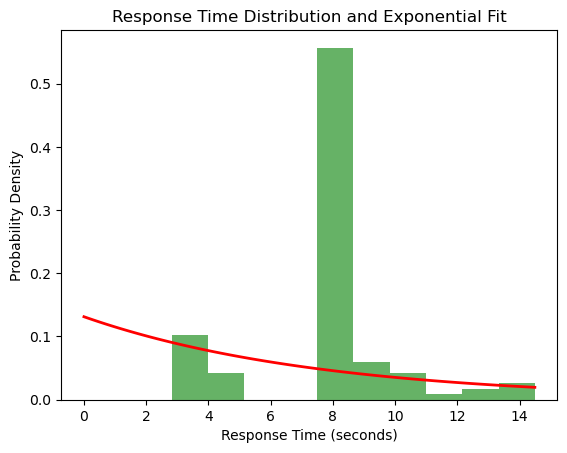

In [5]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

#convert to numpy array for analysis
response_times = np.array(response_times)

#stats calculations

#sample mean
sample_mean = np.mean(response_times)
print(f"Sample Mean: {sample_mean}")

#variance
variance = np.var(response_times, ddof=1)  # Using ddof=1 for sample variance
print(f"Variance: {variance}")

#estimate lambda for exponential distribution
lambda_estimate = 1 / np.mean(response_times)

#compute variance of respnose times
variance_estimate = np.var(response_times)

#Kolmogorov-Smirnov test (goodness of fit)
d, p_value = stats.kstest(response_times, 'expon', args=(0, 1/lambda_estimate))

#output results
print(f"Estimated Lambda: {lambda_estimate}")
print(f"Variance of Response Times: {variance_estimate}")
print(f"KS Test Statistic: {d}")
print(f"P-Value: {p_value}")

#LLN (law of large numbers!) Observing mean convergence
mean_convergence = [np.mean(response_times[:i+1]) for i in range(num_samples)]

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_samples + 1), mean_convergence, label='Sample Mean')
plt.axhline(y=1/lambda_estimate, color='r', linestyle='--', label=f'Theoretical Mean (1/lambda)')
plt.title('Law of Large Numbers: Sample Mean Convergence')
plt.xlabel('Number of Samples')
plt.ylabel('Sample Mean')
plt.legend()
plt.show()

#CLT (Central Limit Theorem) Distribution of Sample Means
bootstrap_samples = 1000
bootstrap_means = np.random.choice(response_times, (bootstrap_samples, num_samples), replace=True).mean(axis=1)

plt.hist(bootstrap_means, bins=20, density=True, alpha=0.6, color='b')
plt.title('Bootstrap Distribution of Response Time Means')
plt.xlabel('Mean Response Time (seconds)')
plt.ylabel('Density')
plt.show()

#histogram and exponential distribution
plt.hist(response_times, bins=10, density=True, alpha=0.6, color='g')

#estimated exponential distribution
x = np.linspace(0, max(response_times), 100)
plt.plot(x, lambda_estimate * np.exp(-lambda_estimate * x), 'r-', lw=2)

plt.title('Response Time Distribution and Exponential Fit')
plt.xlabel('Response Time (seconds)')
plt.ylabel('Probability Density')
plt.show()